In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('supply_chain_data.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [5]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

#### 1. relationship between price and revenue generated


In [11]:
df['Product type'].unique()

array(['haircare', 'skincare', 'cosmetics'], dtype=object)

In [12]:
df_hair=df[df['Product type']=='haircare']
df_skin=df[df['Product type']=='skincare']
df_cos=df[df['Product type']=='cosmetics']


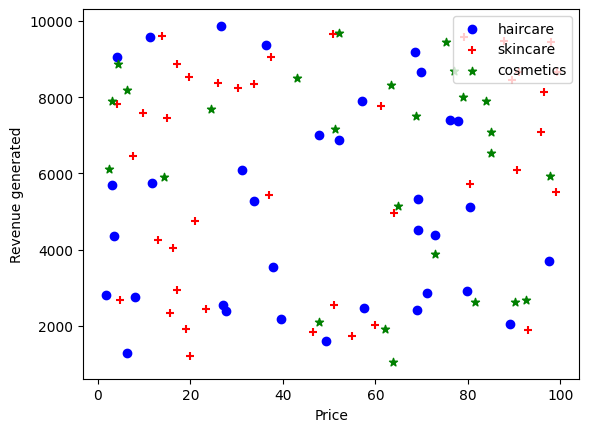

In [39]:

plt.scatter(df_hair['Price'],df_hair['Revenue generated'],color='blue',label='haircare')
plt.scatter(df_skin['Price'],df_skin['Revenue generated'],color='red',marker='+',label='skincare')
plt.scatter(df_cos['Price'],df_cos['Revenue generated'],color='green',marker='*', label='cosmetics')
plt.xlabel('Price')
plt.ylabel('Revenue generated')
plt.legend(loc='upper right')
plt.show()

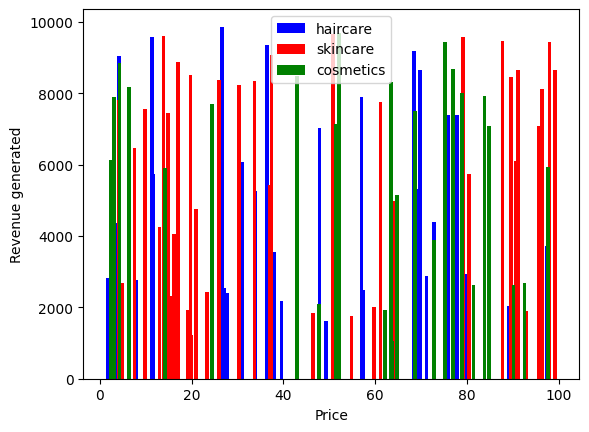

In [36]:
plt.bar(df_hair['Price'],df_hair['Revenue generated'],color='blue',label='haircare')
plt.bar(df_skin['Price'],df_skin['Revenue generated'],color='red',label='skincare')
plt.bar(df_cos['Price'],df_cos['Revenue generated'],color='green',label='cosmetics')
plt.xlabel('Price')
plt.ylabel('Revenue generated')
plt.legend()
plt.show()

##### 2. which product type generated more revenue

In [40]:
df.groupby(['Product type'])['Revenue generated'].sum()

Product type
cosmetics    161521.265999
haircare     174455.390605
skincare     241628.162133
Name: Revenue generated, dtype: float64

In [41]:
# skincare generated more revenue

#### 3. product type versus sales

In [42]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [46]:
df_sales=df.groupby(['Product type'],as_index=False)['Number of products sold'].sum()
df_sales

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


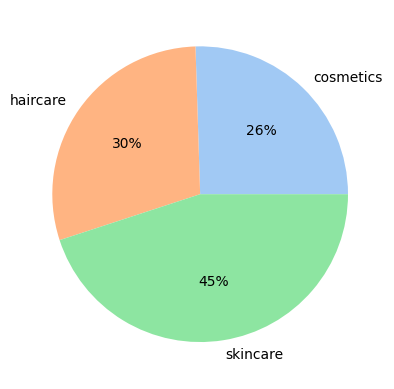

In [50]:
colors=sns.color_palette('pastel')
plt.pie(df_sales['Number of products sold'],labels=df_sales['Product type'],colors=colors,autopct='%.0f%%')
plt.show()

In [48]:
# skin care makes the most sales

#### 4. revenue generated from shipping carriers

In [49]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [51]:
total_revenue = df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
total_revenue

,Shipping carriers,Revenue generated
0,Carrier A,142629.994607
1,Carrier B,250094.646988
2,Carrier C,184880.177143


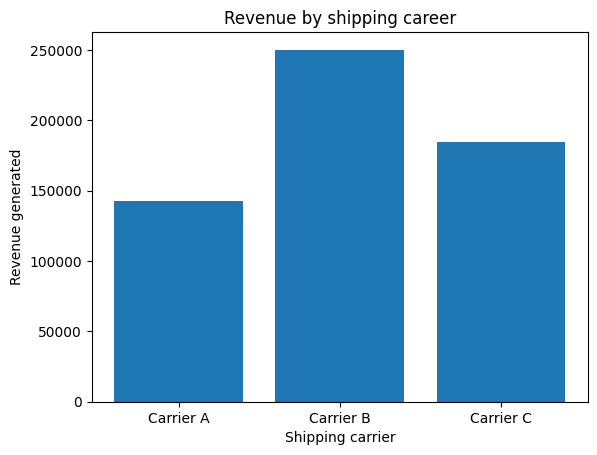

In [53]:
plt.bar(total_revenue['Shipping carriers'],total_revenue['Revenue generated'])
plt.title('Revenue by shipping career')
plt.xlabel('Shipping carrier')
plt.ylabel('Revenue generated')
plt.show()

#### 5. Average lead time and Average Manufacturing Costs for all products

In [56]:
df.groupby(['Product type'], as_index=False)['Lead time','Manufacturing costs'].mean()

C:\Users\ESTHER\AppData\Local\Temp\ipykernel_6060\1342428181.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Product type'], as_index=False)['Lead time','Manufacturing costs'].mean()


,Product type,Lead time,Manufacturing costs
0,cosmetics,13.538462,43.052740
1,haircare,18.705882,48.457993
2,skincare,18.000000,48.993157


#### 6. revenue generated by each SKU:

In [58]:
df.groupby(['SKU'], as_index=False)['Revenue generated'].sum().

,SKU,Revenue generated
0,SKU0,8661.996792
1,SKU1,7460.900065
2,SKU10,2330.965802
3,SKU11,6099.944116
4,SKU12,2873.741446
...,...,...
95,SKU95,7386.363944
96,SKU96,7698.424766
97,SKU97,4370.916580
98,SKU98,8525.952560


#### 7. stock levels of each SKU:

In [75]:
df_stock=df[['SKU','Stock levels']]
df_stock.sort_values(by='Stock levels',ascending=False, ignore_index=False).head()


,SKU,Stock levels
12,SKU12,100
51,SKU51,100
59,SKU59,100
91,SKU91,98
49,SKU49,97


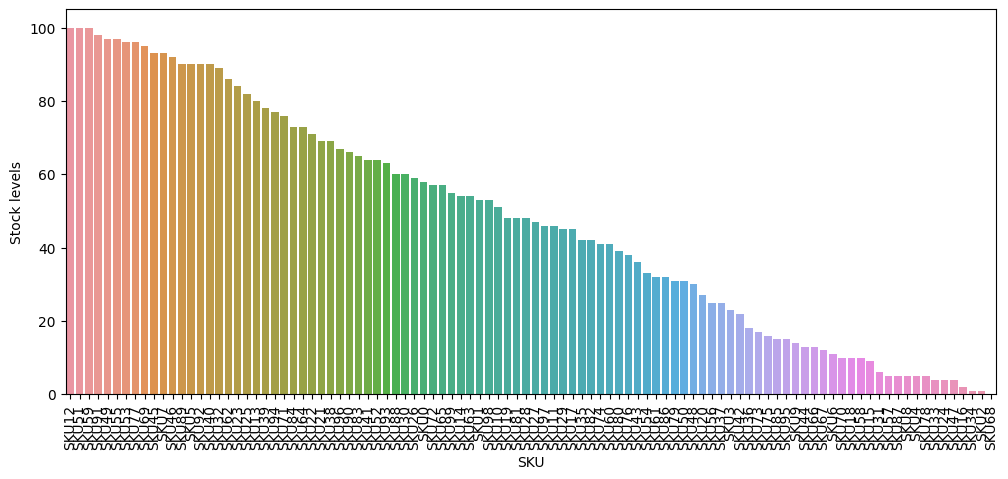

In [70]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='SKU',y='Stock levels',order=df.sort_values('Stock levels',ascending = False).SKU)
plt.xticks(rotation=90)
plt.show()

#### 8. analyze the shipping cost of Carriers:

In [79]:
df_sales=df.groupby(['Shipping carriers'],as_index=False)['Shipping costs'].sum()
df_sales

,Shipping carriers,Shipping costs
0,Carrier A,155.537831
1,Carrier B,236.897620
2,Carrier C,162.379457


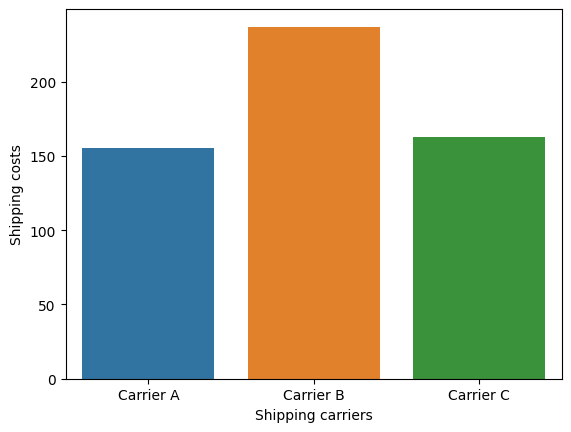

In [80]:
sns.barplot(data=df_sales, x='Shipping carriers',y='Shipping costs')
plt.show()

####  9. cost distribution by transportation mode:

In [83]:
df_cost=df.groupby(['Transportation modes'], as_index=False)['Costs'].sum()
df_cost

,Transportation modes,Costs
0,Air,14604.527498
1,Rail,15168.931559
2,Road,16048.193639
3,Sea,7102.925520


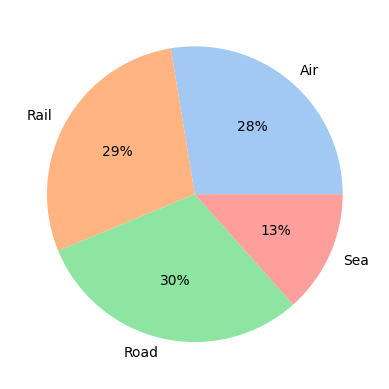

In [85]:
plt.pie(df_cost['Costs'],labels=df_cost['Transportation modes'],colors=colors,autopct='%.0f%%')
plt.show()

#### 10. average defect rate of all product types

In [88]:
df_defect=df.groupby(['Transportation modes'],as_index=False)['Defect rates'].mean()
df_defect

,Transportation modes,Defect rates
0,Air,1.823924
1,Rail,2.318814
2,Road,2.620938
3,Sea,2.315281


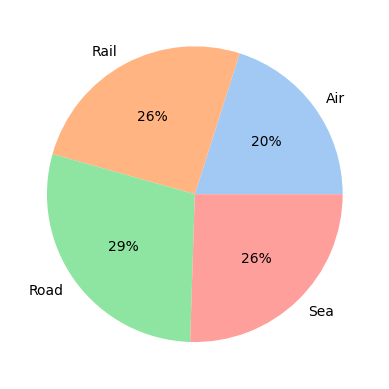

In [89]:
plt.pie(df_defect['Defect rates'],labels=df_defect['Transportation modes'],colors=colors,autopct='%.0f%%')
plt.show()

#### heatmap to show the relation among the different columns

In [90]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [91]:
df['Location'].unique()

array(['Mumbai', 'Kolkata', 'Delhi', 'Bangalore', 'Chennai'], dtype=object)

In [95]:
from sklearn.preprocessing import LabelEncoder

model=LabelEncoder()
df['Product_type_n']=model.fit_transform(df['Product type'])
df['Customer demographics_n']=model.fit_transform(df['Customer demographics'])
df['Location_n']=model.fit_transform(df['Location'])
df['Transportation modes_n']=model.fit_transform(df['Transportation modes'])

In [104]:
df_corr=df.corr(method='pearson')

C:\Users\ESTHER\AppData\Local\Temp\ipykernel_6060\2443145835.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr(method='pearson')


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs,Product_type_n,Customer demographics_n,Location_n,Transportation modes_n
Price,1.000000,0.019083,0.005739,0.038424,0.078261,0.044855,0.095819,0.071942,0.058543,0.152185,-0.124575,-0.301313,-0.184123,-0.147247,0.088501,-0.118260,0.141159,-0.045747,0.008989
Availability,0.019083,1.000000,0.087496,-0.075170,-0.025900,0.170439,0.143769,-0.051377,-0.044179,-0.156669,0.050134,0.065333,0.134652,0.040626,-0.027315,0.011193,-0.030836,-0.180713,0.030393
Number of products sold,0.005739,0.087496,1.000000,-0.001641,0.022189,-0.046419,0.015992,0.087315,0.044285,0.041230,0.187945,-0.048939,0.034284,-0.082726,-0.036951,0.104189,0.015365,0.139708,0.075610
Revenue generated,0.038424,-0.075170,-0.001641,1.000000,-0.158480,-0.057296,0.029422,-0.109211,-0.072892,-0.014178,-0.037441,0.014073,-0.214025,-0.125335,0.027252,-0.003482,-0.143585,0.033924,-0.052785
Stock levels,0.078261,-0.025900,0.022189,-0.158480,1.000000,0.072571,-0.111455,-0.094883,0.072907,0.067880,0.043763,-0.050592,0.033243,-0.149478,-0.012088,-0.234523,0.051869,0.038421,-0.048568
Lead times,0.044855,0.170439,-0.046419,-0.057296,0.072571,1.000000,0.105459,-0.045156,-0.120746,-0.002818,-0.145324,0.003364,-0.024441,0.015681,0.243686,0.063697,-0.062386,-0.061358,-0.169066
Order quantities,0.095819,0.143769,0.015992,0.029422,-0.111455,0.105459,1.000000,-0.002561,0.004261,-0.086189,-0.086567,0.112347,-0.026784,0.018986,0.167306,0.031378,0.121561,0.028195,-0.025173
Shipping times,0.071942,-0.051377,0.087315,-0.109211,-0.094883,-0.045156,-0.002561,1.000000,0.045108,-0.022214,-0.060470,-0.016953,0.029132,-0.036673,-0.045541,-0.177486,0.009490,0.021345,0.117325
Shipping costs,0.058543,-0.044179,0.044285,-0.072892,0.072907,-0.120746,0.004261,0.045108,1.000000,0.029680,-0.097979,-0.005653,0.005984,0.083139,0.051671,-0.184026,0.036614,0.122660,-0.116143
Lead time,0.152185,-0.156669,0.041230,-0.014178,0.067880,-0.002818,-0.086189,-0.022214,0.029680,1.000000,0.212676,0.026756,-0.121999,0.297099,0.045219,0.182971,0.014808,-0.016764,0.036990


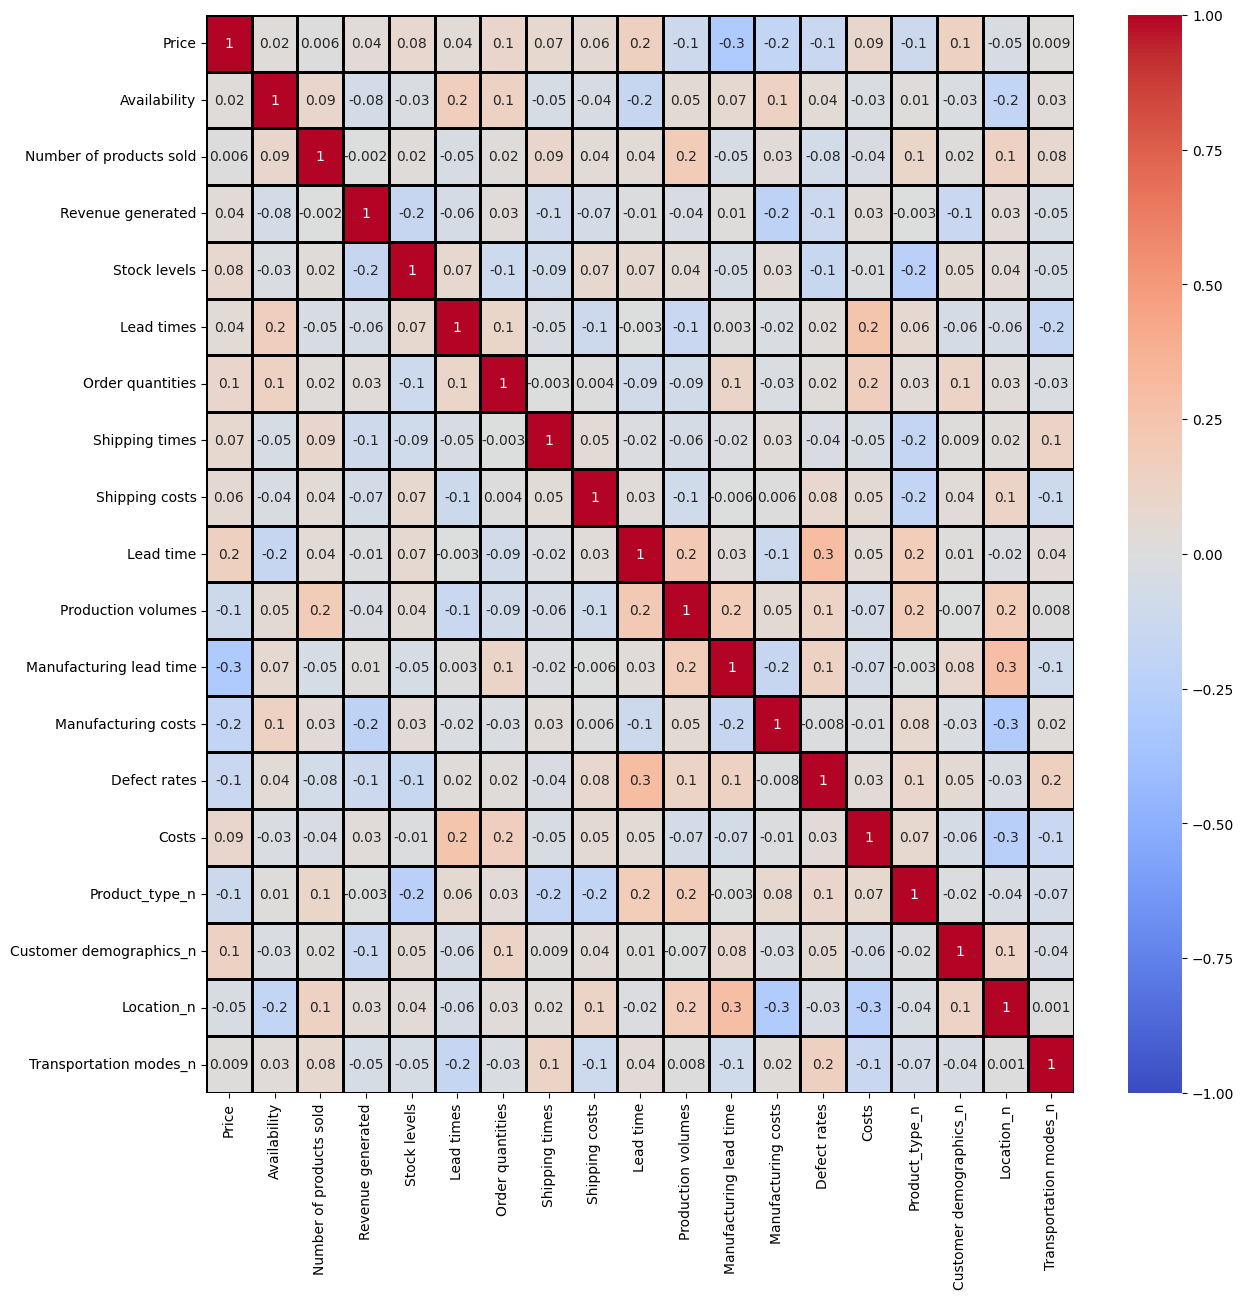

In [105]:
plt.figure(figsize=(14,14))
heatmap=sns.heatmap(df_corr, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=2,linecolor='black' )